In [158]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import requests
import time
import math

In [159]:
db = pd.read_csv('C:\\Users\\Asus\\Downloads\\good books\\goodreads_data.csv')
db 

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...


In [160]:
db.info()
db.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64

Pt Genres aloca un cod la fiecare 

In [161]:
db['Genres'] = pd.factorize(db['Genres'])[0]
db

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,0,4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,1,4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...",2,4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,3,4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,4,3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,8040,3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,875,4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,8041,3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,8042,4.13,263,https://www.goodreads.com/book/show/19347252-w...


Pt Description aloc un cod


In [162]:
db['Description'] = pd.factorize(db['Description'])[0]
db

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,0,0,4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,1,1,4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,2,2,4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,3,3,4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,4,4,3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,9883,8040,3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,9884,875,4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,9885,8041,3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,9886,8042,4.13,263,https://www.goodreads.com/book/show/19347252-w...


Pt Author aloc un cod

In [163]:
db['Author'] = pd.factorize(db['Author'])[0]
db

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,0,0,0,4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,1,1,1,4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,2,2,2,4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,3,3,3,4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,4,4,4,3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",6059,9883,8040,3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,6060,9884,875,4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,6061,9885,8041,3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",6062,9886,8042,4.13,263,https://www.goodreads.com/book/show/19347252-w...


Eliminam val NaN

In [164]:
df_cleaned = db.dropna()
df_cleaned

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,0,0,0,4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,1,1,1,4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,2,2,2,4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,3,3,3,4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,4,4,4,3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",6059,9883,8040,3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,6060,9884,875,4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,6061,9885,8041,3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",6062,9886,8042,4.13,263,https://www.goodreads.com/book/show/19347252-w...


Eliminam coloane si randuri

-Url

-Avg_Rating

-Num_Ratings

-Unnamed

In [165]:
df = db.drop(['URL', 'Num_Ratings'], axis=1, errors='ignore') 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Book,Author,Description,Genres,Avg_Rating
0,To Kill a Mockingbird,0,0,0,4.27
1,Harry Potter and the Philosopher’s Stone (Harr...,1,1,1,4.47
2,Pride and Prejudice,2,2,2,4.28
3,The Diary of a Young Girl,3,3,3,4.18
4,Animal Farm,4,4,4,3.98
...,...,...,...,...,...
9995,"Breeders (Breeders Trilogy, #1)",6059,9883,8040,3.44
9996,Dynamo,6060,9884,875,4.23
9997,The Republic of Trees,6061,9885,8041,3.29
9998,"Waking Up (Healing Hearts, #1)",6062,9886,8042,4.13


Sterge duplicatiile

In [166]:
df.duplicated().sum()
df= df.drop_duplicates()
df

,Book,Author,Description,Genres,Avg_Rating
0,To Kill a Mockingbird,0,0,0,4.27
1,Harry Potter and the Philosopher’s Stone (Harr...,1,1,1,4.47
2,Pride and Prejudice,2,2,2,4.28
3,The Diary of a Young Girl,3,3,3,4.18
4,Animal Farm,4,4,4,3.98
...,...,...,...,...,...
9995,"Breeders (Breeders Trilogy, #1)",6059,9883,8040,3.44
9996,Dynamo,6060,9884,875,4.23
9997,The Republic of Trees,6061,9885,8041,3.29
9998,"Waking Up (Healing Hearts, #1)",6062,9886,8042,4.13


Histograma

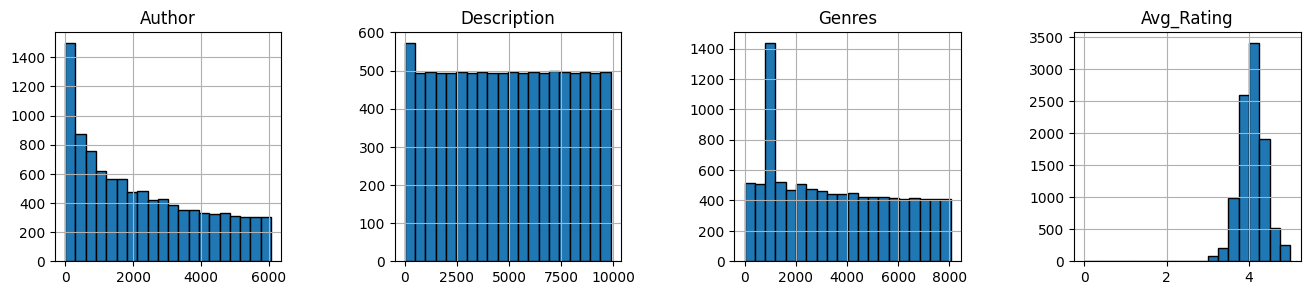

In [167]:
df.hist(figsize=(20,20), bins=20, layout=(6,6), edgecolor='black')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Describe

In [168]:
df.describe()

,Author,Description,Genres,Avg_Rating
count,9971.000000,9971.000000,9971.000000,9971.000000
mean,2270.354428,4905.345703,3553.497944,4.067992
std,1792.426027,2876.367226,2378.864429,0.335349
min,0.000000,-1.000000,0.000000,0.000000
25%,658.500000,2413.500000,1234.500000,3.880000
50%,1894.000000,4906.000000,3289.000000,4.080000
75%,3691.500000,7394.500000,5606.500000,4.260000
max,6063.000000,9887.000000,8042.000000,5.000000


Null

In [169]:
df.isnull().sum()

Book           0
Author         0
Description    0
Genres         0
Avg_Rating     0
dtype: int64

Type

In [170]:
df.dtypes

Book            object
Author           int64
Description      int64
Genres           int64
Avg_Rating     float64
dtype: object

Corelatie

In [171]:
# Selectează doar coloanele numerice
numeric_df = df.select_dtypes(include=['number'])

# Calculează corelația între coloanele numerice
correlation_matrix = numeric_df.corr()

# Afișează matricea de corelație
correlation_matrix

,Author,Description,Genres,Avg_Rating
Author,1.000000,0.729799,0.413936,0.024475
Description,0.729799,1.000000,0.669874,0.003092
Genres,0.413936,0.669874,1.000000,-0.141193
Avg_Rating,0.024475,0.003092,-0.141193,1.000000


Heatmap

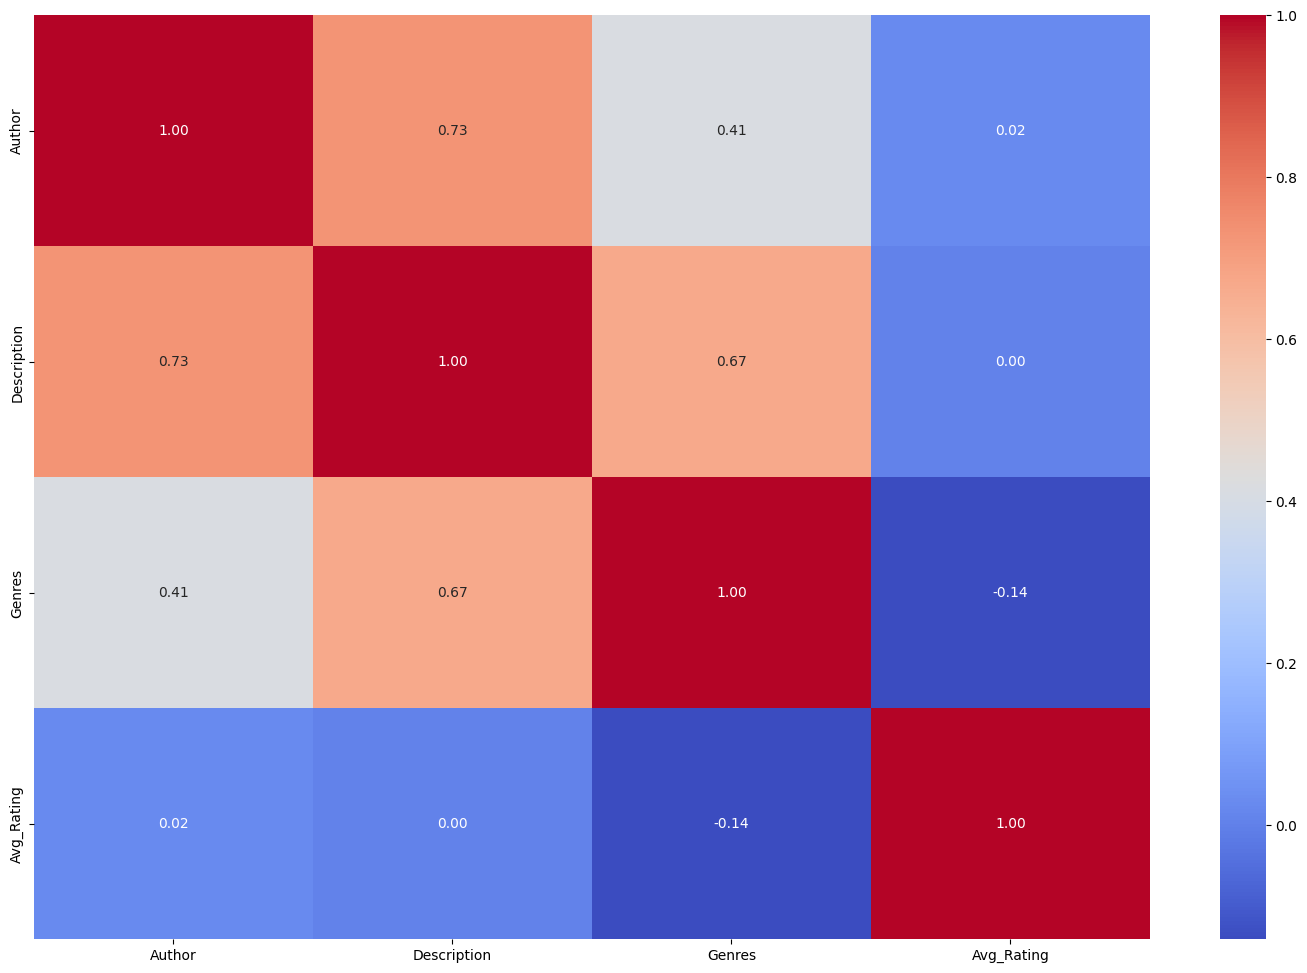

In [172]:
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

NaN procent

In [173]:
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {percentage:.2%}')

Book: 0.00%
Author: 0.00%
Description: 0.00%
Genres: 0.00%
Avg_Rating: 0.00%


Entropia

In [174]:
# Funcție pentru calcularea entropiei
def calculate_entropy(column):
    # Elimină valorile lipsă
    column = column.dropna()
    # Calculează frecvențele relative
    value_counts = column.value_counts(normalize=True)
    # Calculează entropia folosind formula H(X) = -Σ P(x) * log2(P(x))
    entropy = -sum(p * math.log2(p) for p in value_counts)
    return entropy

# Aplicăm funcția pe coloana 'Genres'
if 'Genres' in df.columns:
    genre_entropy = calculate_entropy(df['Genres'])
    print(f"Entropia pentru coloana 'Genres': {genre_entropy:.4f}")
else:
    print("Coloana 'Genres' nu există în DataFrame.")

Entropia pentru coloana 'Genres': 12.0489


Gini index

In [175]:
# Funcție pentru calcularea Gini Index
def calculate_gini(column):
    # Elimină valorile lipsă
    column = column.dropna()
    # Calculează frecvențele relative
    value_counts = column.value_counts(normalize=True)
    # Calculează Gini Index folosind formula G = 1 - Σ P(x)^2
    gini = 1 - sum(p ** 2 for p in value_counts)
    return gini

# Aplicăm funcția pe coloana 'Genres'
if 'Genres' in df.columns:
    genre_gini = calculate_gini(df['Genres'])
    print(f"Gini Index pentru coloana 'Genres': {genre_gini:.4f}")
else:
    print("Coloana 'Genres' nu există în DataFrame.")

Gini Index pentru coloana 'Genres': 0.9906


information quantity

In [176]:
# Funcție pentru calcularea cantității de informație
def calculate_information_quantity(column):
    # Elimină valorile lipsă
    column = column.dropna()
    # Calculează frecvențele relative
    value_counts = column.value_counts(normalize=True)
    # Calculează cantitatea de informație pentru fiecare valoare
    information_quantity = {value: -math.log2(prob) for value, prob in value_counts.items()}
    return information_quantity

# Aplicăm funcția pe coloana 'Genres'
if 'Genres' in df.columns:
    genre_information_quantity = calculate_information_quantity(df['Genres'])
    print("Cantitatea de informație pentru fiecare valoare din 'Genres':")
    for genre, info in genre_information_quantity.items():
        print(f"{genre}: {info:.4f} bits")
else:
    print("Coloana 'Genres' nu există în DataFrame.")

Cantitatea de informație pentru fiecare valoare din 'Genres':
875: 3.3796 bits
239: 7.6688 bits
491: 7.9260 bits
1438: 8.6986 bits
2798: 8.9616 bits
2385: 9.1136 bits
1534: 9.3766 bits
2174: 9.8241 bits
3269: 9.8241 bits
1449: 10.1136 bits
6692: 10.1136 bits
2176: 10.1136 bits
1546: 10.1136 bits
3042: 10.2835 bits
1572: 10.2835 bits
2162: 10.4762 bits
3973: 10.4762 bits
897: 10.4762 bits
3056: 10.4762 bits
1481: 10.4762 bits
2091: 10.4762 bits
85: 10.4762 bits
457: 10.6986 bits
2584: 10.6986 bits
1155: 10.6986 bits
898: 10.6986 bits
1691: 10.6986 bits
1146: 10.6986 bits
4311: 10.6986 bits
4070: 10.6986 bits
800: 10.9616 bits
2218: 10.9616 bits
512: 10.9616 bits
1697: 10.9616 bits
264: 10.9616 bits
2427: 10.9616 bits
3025: 10.9616 bits
3289: 10.9616 bits
2225: 10.9616 bits
1184: 10.9616 bits
1283: 10.9616 bits
2945: 11.2835 bits
1475: 11.2835 bits
1356: 11.2835 bits
641: 11.2835 bits
2087: 11.2835 bits
3298: 11.2835 bits
2150: 11.2835 bits
1940: 11.2835 bits
2: 11.2835 bits
1031: 11.283

Separare genuri

In [177]:
# Exemplu de date
data = {'Book': ['Book1', 'Book2', 'Book3'],
        'Genres': ['Fiction, Mystery', 'Romance, Drama', 'Science Fiction, Fantasy']}
df = pd.DataFrame(data)


# Afișarea rezultatului
print(df)

    Book                    Genres
0  Book1          Fiction, Mystery
1  Book2            Romance, Drama
2  Book3  Science Fiction, Fantasy


In [178]:
# Creează coloane binare pentru fiecare gen folosind get_dummies
genres_dummies = df['genres'].str.join('|').str.get_dummies()

# Adaugă o coloană cu genurile combinate într-un singur șir
df['all_genres'] = df['genres'].apply(lambda x: ', '.join(x))

# Concatenează DataFrame-ul original cu genurile codificate
df = pd.concat([df, genres_dummies], axis=1)

# Afișează DataFrame-ul rezultat
print(df)

KeyError: 'genres'